In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install sklearn

In [ ]:
import sklearn
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.autograd import Variable
import torch.utils.data as data_utils
import seaborn as sns
import pandas as pd
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from torch import optim
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import keras 
import sklearn
%matplotlib inline

In [ ]:
def remove_space_columns(data):
    temp={}
    for i in data:
        temp[i]=i.replace(' ','_')
    #print(temp)
    return temp

In [ ]:
data= pd.read_csv(filepath,sep=';')

In [ ]:
data.rename(columns=remove_space_columns(data.columns),inplace=True)

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5969,47,1,1,1,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,37,4,1,0,0,1,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5971,47,4,1,0,0,1,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.Pathology.replace([1],0,inplace=True)
data.Pathology.replace([2,3],1,inplace=True)

get dummies for the TCT and create bin for the ages

In [ ]:
data['Agele24']=0
data['Agebw24_34']=0
data['AgeBw34_44']=0
data['AgeBw44and54']=0
data['AgeBw54and64']=0
data['Ageabove64']=0

In [ ]:
data
max_p = data['viral_load'].max()
print(max_p)
data['viral_load'] = data['viral_load'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.1'] = data['viral_load.1'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.2'] = data['viral_load.2'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.3'] = data['viral_load.3'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.4'] = data['viral_load.4'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.5'] = data['viral_load.5'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.6'] = data['viral_load.6'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.7'] = data['viral_load.7'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.8'] = data['viral_load.8'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.9'] = data['viral_load.9'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.10'] = data['viral_load.10'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.11'] = data['viral_load.11'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.12'] = data['viral_load.12'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data

10000000


,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
max_q = data['viral_load'].max()
print(max_q)



7


In [ ]:
data['Agele24']=data.Age<=24
data['Agebw24_34']=(data.Age>24)& (data.Age<=34)
data['AgeBw34_44']=(data.Age>34)& (data.Age<=45)
data['AgeBw44and54']=(data.Age>45)& (data.Age<=55)
data['AgeBw54and64']=(data.Age>55)& (data.Age<=65)
data['Ageabove64']=(data.Age>65)

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,False,False
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,False,False,False
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,False,False


In [ ]:
data['Agele24']=data['Agele24'].replace({True:1,False:0})
data['Agebw24_34']=data['Agebw24_34'].replace({True:1,False:0})

data['AgeBw34_44']=data['AgeBw34_44'].replace({True:1,False:0})
data['AgeBw44and54']=data['AgeBw44and54'].replace({True:1,False:0})
data['AgeBw54and64']=data['AgeBw54and64'].replace({True:1,False:0})
data['Ageabove64']=data['Ageabove64'].replace({True:1,False:0})

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df=data.copy()

In [ ]:
age = ['Age','Agele24','Agebw24_34','AgeBw34_44','AgeBw44and54','AgeBw54and64', 'Ageabove64']
df = df.drop(age, axis = 1)

In [ ]:
df

,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5969,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5971,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

df = df.loc[(df!=0).any(axis=1)]

In [ ]:
df

,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology
4000,0,1,0,0,1,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4001,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0
4002,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0
4004,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5969,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5971,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Get dummies for the TCT columns

In [ ]:
dum=pd.get_dummies(df.TCT,prefix='TCT')

In [ ]:
dum

,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
4000,1,0,0,0,0
4001,0,0,1,0,0
4002,0,0,0,1,0
4003,1,0,0,0,0
4004,1,0,0,0,0
...,...,...,...,...,...
5968,0,0,0,0,1
5969,0,1,0,0,0
5970,0,0,0,0,1
5971,0,0,0,0,1


In [ ]:
if 'TCT' in df.columns:
    del df['TCT']
if 'Age' in df.columns:
    del df['Age']
    
# df=pd.concat([df,dum],axis=1)

In [ ]:
col = df.columns
print(col)

Index(['HPV_result', 'v_16', 'viral_load', 'v_18', 'viral_load.1', 'v_31',
       'viral_load.2', 'v_33', 'viral_load.3', 'v_35', 'viral_load.4', 'v_39',
       'viral_load.5', 'v_45', 'viral_load.6', 'v_51', 'viral_load.7', 'v_52',
       'viral_load.8', 'v_56', 'viral_load.9', 'v_58', 'viral_load.10', 'v_59',
       'viral_load.11', 'v_68', 'viral_load.12', 'Pathology'],
      dtype='object')


In [ ]:
y = df.Pathology
list = ['Pathology']
# list = ['Agele24','Agebw24_34','AgeBw34_44','AgeBw44and54','AgeBw54and64', 'Ageabove64','Pathology']
x = df.drop(list, axis = 1)
x.head()
x.shape

(1910, 27)

In [ ]:
x['max_virus']= x.max(axis = 1)
print(x)

x

      HPV_result  v_16  viral_load  ...  v_68  viral_load.12  max_virus
4000           1     0           0  ...     0              0          2
4001           1     0           0  ...     0              0          2
4002           0     0           0  ...     0              0          0
4003           1     0           0  ...     1              2          2
4004           1     1           4  ...     0              0          4
...          ...   ...         ...  ...   ...            ...        ...
5968           1     0           0  ...     0              0          5
5969           1     1           5  ...     0              0          5
5970           1     0           0  ...     0              0          4
5971           1     0           0  ...     0              0          6
5972           1     0           0  ...     0              0          5

[1910 rows x 28 columns]


,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus
4000,1,0,0,1,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,2
4002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
4004,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
x=pd.concat([x,dum],axis=1)
x

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
4000,1,0,0,1,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0
4001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,2,0,0,1,0,0
4002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,0,0
4004,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1


Number of patients with CIN:  632
number of patients without CIN:  1278


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


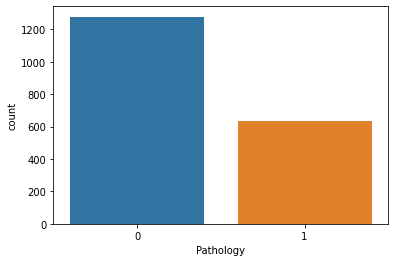

In [ ]:
import seaborn as sns
ax = sns.countplot(y,label="Count") 
N,Y = y.value_counts()

print('Number of patients with CIN: ' , Y)
print('number of patients without CIN: ', N)


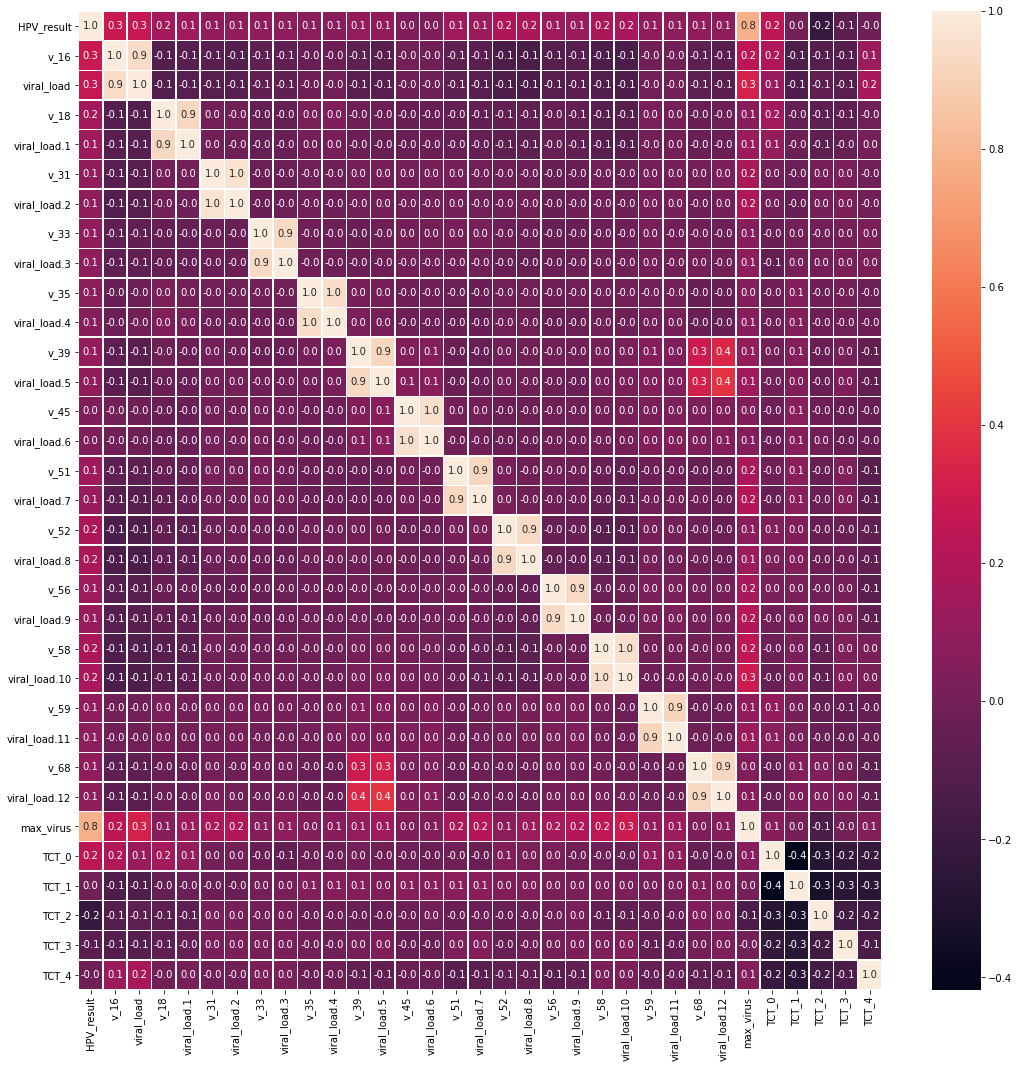

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
x=pd.concat([x,y],axis=1)
x

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4,Pathology
4000,1,0,0,1,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0
4001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0
4002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,0,0,0
4004,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1,0


In [ ]:
X=x.copy()
Y=x['Pathology']
del X['Pathology']
X=X
X.shape



(1910, 33)

In [ ]:
X

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
4000,1,0,0,1,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0
4001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,2,0,0,1,0,0
4002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,0,0
4004,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1


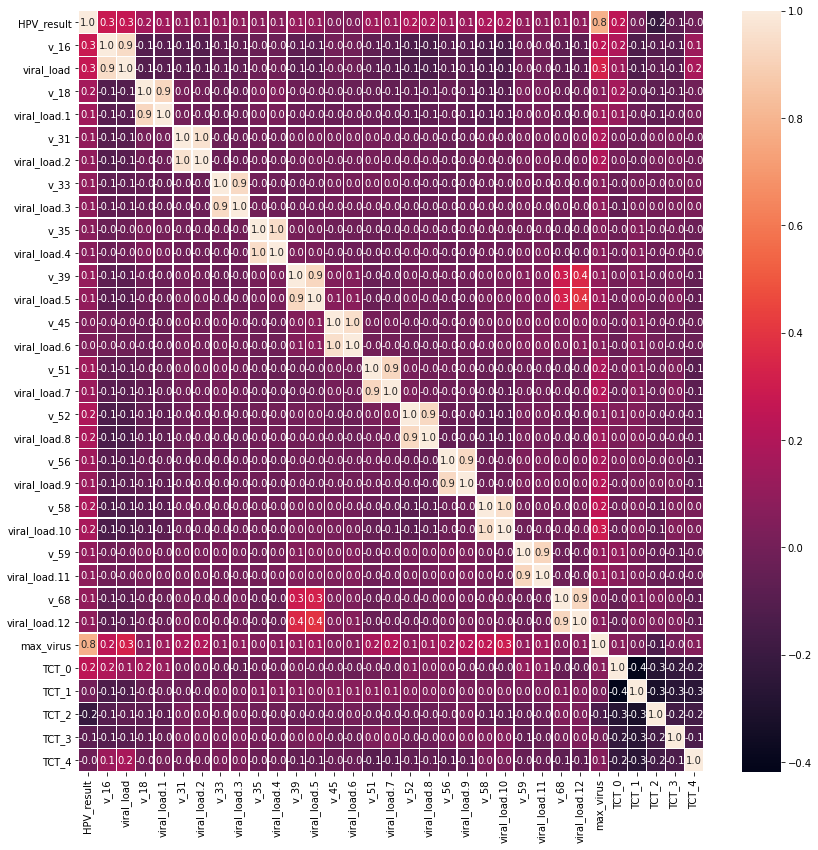

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Normalization the data between 0 and 1

In [ ]:
def Scalar(X,Y):
    min_max_scaler = preprocessing.MinMaxScaler()
    NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12", "max_virus"]
    # ["viral_load.1", "viral_load.3", "viral_load.5", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.11", "viral_load.12"]
    #["viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12"]
    #['viral_load','viral_load.2', 'viral_load.4', 'viral_load.6', 'viral_load.10']

    for i in NUMERIC_COLUMN:
        X[i]=min_max_scaler.fit_transform(X[i].values.astype('float32').reshape(-1,1))
        
      
    return X, Y
  

Convert the data from numpy array to torch tensor

In [ ]:

def getNewData():
    X1, Y1 = Scalar(X,Y)
    NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12", "max_virus"]

    CATEGORICAL_COLUMN = ["HPV_result", "v_16", "v_18", "v_31", "v_33", "v_35", "v_39", "v_45", "v_51", "v_52", "v_56", "v_58", "v_59", "v_68"] 

    LABEL_COLUMN = "Pathology"
    CATEGORICAL_COLUMN_WITH_IDENTITY = ["TCT_0", "TCT_1", "TCT_2", "TCT_3", "TCT_4"]


    for i in CATEGORICAL_COLUMN:
      X1[i]=np.array(X1[i].values.astype('float32'))
      # x_test[i]=np.array(x_test[i].values.astype('float32'))

    for i in X[CATEGORICAL_COLUMN]:
      X1[i]=np.array(X1[i].values.astype('int64'))
      # x_test[i]=np.array(x_test[i].values.astype('int64'))

    for i in X[CATEGORICAL_COLUMN_WITH_IDENTITY]:
      X1[i]=np.array(X1[i].values.astype('int64'))
      # x_test[i]=np.array(x_test[i].values.astype('int64'))

    Y1=pd.DataFrame(data=np.array(Y1.values.astype('int64')),columns=['Pathology'])
    # y_test=pd.DataFrame(data=np.array(y_test.values.astype('int64')),columns=['Pathology'])

    return X1, Y1


In [ ]:
X1, Y1 = getNewData()

Define base columns

In [ ]:

import tensorflow as tf
HPV_result = tf.feature_column.categorical_column_with_identity("HPV_result",  num_buckets=1000)
v_16 = tf.feature_column.categorical_column_with_identity("v_16",  num_buckets=1000)
viral_load = tf.feature_column.numeric_column("viral_load")
v_18 = tf.feature_column.categorical_column_with_identity("v_18",  num_buckets=1000)
viral_load_1 = tf.feature_column.numeric_column("viral_load.1")
v_31 = tf.feature_column.categorical_column_with_identity("v_31",  num_buckets=1000)
viral_load_2 = tf.feature_column.numeric_column("viral_load.2")
v_33 = tf.feature_column.categorical_column_with_identity("v_33",  num_buckets=1000)
viral_load_3 = tf.feature_column.numeric_column("viral_load.3")
v_35 = tf.feature_column.categorical_column_with_identity("v_35",  num_buckets=1000)
viral_load_4 = tf.feature_column.numeric_column("viral_load.4")
v_39 = tf.feature_column.categorical_column_with_identity("v_39",  num_buckets=1000)
viral_load_5 = tf.feature_column.numeric_column("viral_load.5")
v_45 = tf.feature_column.categorical_column_with_identity("v_45",  num_buckets=1000)
viral_load_6 = tf.feature_column.numeric_column("viral_load.6")
v_51 = tf.feature_column.categorical_column_with_identity("v_51",  num_buckets=1000)
viral_load_7 = tf.feature_column.numeric_column("viral_load.7")
v_52 = tf.feature_column.categorical_column_with_identity("v_52",  num_buckets=1000)
viral_load_8 = tf.feature_column.numeric_column("viral_load.8")
v_56 = tf.feature_column.categorical_column_with_identity("v_56",  num_buckets=1000)
viral_load_9 = tf.feature_column.numeric_column("viral_load.9")
v_58 = tf.feature_column.categorical_column_with_identity("v_58",  num_buckets=1000)
viral_load_10 = tf.feature_column.numeric_column("viral_load.10")
v_59 = tf.feature_column.categorical_column_with_identity("v_59",  num_buckets=1000)
viral_load_11 = tf.feature_column.numeric_column("viral_load.11")
v_68 = tf.feature_column.categorical_column_with_identity("v_68",  num_buckets=1000)
viral_load_12 = tf.feature_column.numeric_column("viral_load.12")
max_virus = tf.feature_column.numeric_column("max_virus")
TCT_0 = tf.feature_column.categorical_column_with_identity("TCT_0",  num_buckets=1000)
TCT_1 = tf.feature_column.categorical_column_with_identity("TCT_1",  num_buckets=1000)
TCT_2 = tf.feature_column.categorical_column_with_identity("TCT_2",  num_buckets=1000)
TCT_3 = tf.feature_column.categorical_column_with_identity("TCT_3",  num_buckets=1000)
TCT_4 = tf.feature_column.categorical_column_with_identity("TCT_4",  num_buckets=1000)

The wide model

In [ ]:
wide_columns = [
  HPV_result, v_16, v_18, v_31, v_33, v_35, v_39, v_45, v_51, v_52, v_56, v_58, v_59, v_68, TCT_0, TCT_1, TCT_2, TCT_3, TCT_4,
  tf.feature_column.crossed_column([HPV_result, TCT_0, TCT_1, TCT_2, TCT_3, TCT_4], hash_bucket_size=int(1e4)),
  tf.feature_column.crossed_column([v_16, v_18, v_31, v_33, v_35, v_39, v_45, v_51, v_52, v_56, v_58, v_59, v_68], hash_bucket_size=int(1e4)),
  tf.feature_column.crossed_column([HPV_result, v_16, v_18, v_31, v_33, v_35, v_39, v_45, v_51, v_52, v_56, v_58, v_59, v_68], hash_bucket_size=int(1e6))]

The deep model

In [ ]:
deep_columns = [
                # viral_load, viral_load_1, viral_load_2, viral_load_3, viral_load_4, viral_load_5, viral_load_6, viral_load_7,viral_load_8, viral_load_9, viral_load_10, viral_load_11, viral_load_12
  tf.feature_column.embedding_column(v_16, dimension=8),
  viral_load,
  tf.feature_column.embedding_column(v_18, dimension=8),
  viral_load_1,
  tf.feature_column.embedding_column(v_31, dimension=8),
  viral_load_2,
  tf.feature_column.embedding_column(v_33, dimension=8),
  viral_load_3,
  tf.feature_column.embedding_column(v_35, dimension=8),
  viral_load_4,
  tf.feature_column.embedding_column(v_39, dimension=8),
  viral_load_5,
  tf.feature_column.embedding_column(v_45, dimension=8),
  viral_load_6,
  tf.feature_column.embedding_column(v_51, dimension=8),
  viral_load_7,
  tf.feature_column.embedding_column(v_52, dimension=8),
  viral_load_8,
  tf.feature_column.embedding_column(v_56, dimension=8),
  viral_load_9,
  tf.feature_column.embedding_column(v_58, dimension=8),
  viral_load_10,
  tf.feature_column.embedding_column(v_59, dimension=8),
  viral_load_11,
  tf.feature_column.embedding_column(v_68, dimension=8),
  viral_load_12,
  max_virus]

Define model structure and start training

WITHOUT SAMPLING

In [ ]:
from functools import partial
import tempfile
import pandas as pd
import urllib

from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, roc_auc_score

from sklearn.model_selection import KFold

num_folds = 10 

kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
kfold.get_n_splits(X1, Y1)
evals = []

# smoter = SMOTE(random_state=42)

for train_index, test_index in kfold.split(X1, Y1):


  COLUMNS = ["HPV_result", "v_16", "viral_load", "v_18", "viral_load.1", "v_31", "viral_load.2", "v_33", "viral_load.3", "v_35", "viral_load.4"
            "v_39", "viral_load.5", "v_45", "viral_load.6", "v_51", "viral_load.7", "v_52", "viral_load.8", "v_56", "viral_load.9", "v_58", "viral_load.10", "v_59", "viral_load.11", "v_68", "viral_load.12", "max_virus", 
             "TCT_0", "TCT_1", "TCT_2", "TCT_3", "TCT_4"]
  CATEGORICAL_COLUMN = ["HPV_result", "v_16", "v_18", "v_31", "v_33", "v_35", "v_39", "v_45", "v_51", "v_52", "v_56", "v_58", "v_59", "v_68"] 

  LABEL_COLUMN = "Pathology"
  NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12", "max_virus"]#["viral_load.1", "viral_load.3",  "viral_load.5", "viral_load.7","viral_load.8", "viral_load.9",  "viral_load.11", "viral_load.12"] 
  #["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12"]
  CATEGORICAL_COLUMN_WITH_IDENTITY = [ "TCT_0", "TCT_1", "TCT_2", "TCT_3", "TCT_4"]




  def input_fn(df):


    x_data = df[0]
    # print(x_data["viral_load"])
    numeric_cols = {k: tf.constant(x_data[k].values)
                    for k in NUMERIC_COLUMN}


    categorical_cols = {k: tf.SparseTensor(
          indices = [[i, 0] for i in range(x_data[k].size)],
          values = x_data[k].values,
          dense_shape=[x_data[k].size,1])
          for k in CATEGORICAL_COLUMN}

    categorical_cols_with_identity = {k: tf.SparseTensor(
          indices=[[j, 0] for j in range(x_data[k].size)],
          values= x_data[k].values,
          dense_shape = [x_data[k].size,1])                                
                          for k in CATEGORICAL_COLUMN_WITH_IDENTITY}
    
    feature_cols  = numeric_cols.copy()
    feature_cols.update(categorical_cols)
    feature_cols.update(categorical_cols_with_identity)


    label = tf.constant(df[1].values)
    return feature_cols, label
    

  def train_input_fn(_x_train, _y_train):
    return input_fn([_x_train, _y_train])

  def eval_input_fn(_x_test, _y_test):
    return input_fn([_x_test, _y_test])


  def pred_input_fun(_y_test):
    return input_fn([_y_test])

  #Training trial 2
  from functools import partial


  import tempfile
  model_dir = tempfile.mkdtemp()
  m = tf.estimator.DNNLinearCombinedClassifier(model_dir=model_dir,
                                                  linear_feature_columns=wide_columns,
                                                  dnn_feature_columns=deep_columns,
                                                  dnn_hidden_units=[16, 128, 32], dnn_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                                                    dnn_activation_fn = tf.nn.relu)

  def training_loop(_X_test, _y_test, _X_train, _y_train ):
    training= m.train(
          input_fn = lambda:train_input_fn(_X_train, _y_train), 
          steps=2000)
    results = m.evaluate(
        input_fn= lambda:eval_input_fn(_X_test, _y_test), 
        steps=10)
    predictions = m.predict(
        input_fn= lambda:pred_input_fun (_y_test))
    evals.append(results)
    print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return results, predictions

  X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
  y_train, y_test = Y1.iloc[train_index], Y1.iloc[test_index]


  x_train = X_train
  x_test = X_test
  y_train = y_train
  y_test = y_test


  NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12", "max_virus"]

  CATEGORICAL_COLUMN = ["HPV_result", "v_16", "v_18", "v_31", "v_33", "v_35", "v_39", "v_45", "v_51", "v_52", "v_56", "v_58", "v_59", "v_68"] 

  LABEL_COLUMN = "Pathology"
  CATEGORICAL_COLUMN_WITH_IDENTITY = ["TCT_0", "TCT_1", "TCT_2", "TCT_3", "TCT_4"]


  for i in CATEGORICAL_COLUMN:
    x_train[i]=np.array(x_train[i].values.astype('float32'))
    x_test[i]=np.array(x_test[i].values.astype('float32'))

  for i in X[CATEGORICAL_COLUMN]:
    x_train[i]=np.array(x_train[i].values.astype('int64'))
    x_test[i]=np.array(x_test[i].values.astype('int64'))

  for i in X[CATEGORICAL_COLUMN_WITH_IDENTITY]:
    x_train[i]=np.array(x_train[i].values.astype('int64'))
    x_test[i]=np.array(x_test[i].values.astype('int64'))

  y_train=pd.DataFrame(data=np.array(y_train.values.astype('int64')),columns=['Pathology'])
  y_test=pd.DataFrame(data=np.array(y_test.values.astype('int64')),columns=['Pathology'])

  model = training_loop(x_test, y_test, x_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmps1el303q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initiali

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmps1el303q/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.68984056, step = 0
INFO:tensorflow:global_step/sec: 29.956
INFO:tensorflow:loss = 0.5153204, step = 100 (3.341 sec)
INFO:tensorflow:global_step/sec: 37.5749
INFO:tensorflow:loss = 0.48040918, step = 200 (2.663 sec)
INFO:tensorflow:global_step/sec: 37.6618
INFO:tensorflow:loss = 0.43922365, step = 300 (2.652 sec)
INFO:tensorflow:global_step/sec: 38.2147
INFO:tensorflow:loss = 0.4144296, step = 400 (2.619 sec)
INFO:tensorflow:gl

In [ ]:
# dat = evals.items()
# dat1 = list(dat) 
# # an_array = np.array(data)

# print(dat1)
for val in evals:
  print(val)

{'accuracy': 0.8167539, 'accuracy_baseline': 0.6701571, 'auc': 0.8384177, 'auc_precision_recall': 0.75375617, 'average_loss': 0.6667709, 'label/mean': 0.32984293, 'loss': 0.6667709, 'precision': 0.7258065, 'prediction/mean': 0.3552356, 'recall': 0.71428573, 'global_step': 2000}
{'accuracy': 0.76963353, 'accuracy_baseline': 0.6701571, 'auc': 0.79259676, 'auc_precision_recall': 0.64822125, 'average_loss': 1.0407498, 'label/mean': 0.32984293, 'loss': 1.0407497, 'precision': 0.7111111, 'prediction/mean': 0.29892507, 'recall': 0.50793654, 'global_step': 2000}
{'accuracy': 0.7277487, 'accuracy_baseline': 0.6701571, 'auc': 0.73071676, 'auc_precision_recall': 0.5326575, 'average_loss': 1.5822324, 'label/mean': 0.32984293, 'loss': 1.5822324, 'precision': 0.59322035, 'prediction/mean': 0.3565658, 'recall': 0.5555556, 'global_step': 2000}
{'accuracy': 0.79581153, 'accuracy_baseline': 0.6701571, 'auc': 0.83816963, 'auc_precision_recall': 0.68823725, 'average_loss': 0.6924116, 'label/mean': 0.32984

In [ ]:


def get_avg(listObj,keyword):
  listValues=[]
  for val in evals:
    for keys, values in val.items():
      if keys==keyword:
        listValues.append(values)
  mean = sum(listValues) / len(listValues)
  return {keyword:mean}

print(get_avg(evals, "accuracy"))
print(get_avg(evals, "accuracy_baseline"))
print(get_avg(evals, "auc"))
print(get_avg(evals, "auc_precision_recall"))
print(get_avg(evals, "average_loss"))
print(get_avg(evals, "label/mean"))
print(get_avg(evals, "loss"))
print(get_avg(evals, "precision"))
print(get_avg(evals, "prediction/mean"))
print(get_avg(evals, "recall"))
print(get_avg(evals, "global_step"))







{'accuracy': 0.7738219916820526}
{'accuracy_baseline': 0.6691099524497985}
{'auc': 0.8025818109512329}
{'auc_precision_recall': 0.6619035243988037}
{'average_loss': 0.8657304644584656}
{'label/mean': 0.3308900475502014}
{'loss': 0.8657304584980011}
{'precision': 0.6934150755405426}
{'prediction/mean': 0.33057214319705963}
{'recall': 0.5710813641548157}
{'global_step': 2000.0}
